<a href="https://colab.research.google.com/github/ritwiks9635/CNN_Project_File/blob/main/Facial_Expression_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 😀☺🙂😢😳 ***Facial Expression Detection*** 😃☺🙂🙄😢

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("fer2013/fer2013.csv")
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
data.Usage.value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

In [ ]:
path = "/content/fer2013/fer2013.csv"
label = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
img = data.pixels

In [ ]:
def get_data(file_path):
  x = []
  y = []
  first = True
  for line in open(file_path):
    if first:
      first = False
    else:
      row = line.split(",")
      y.append(int(row[0]))
      x.append([int(p) for p in row[1].split()])
  x,y = np.array(x)/255.0, np.array(y)
  return x, y

In [ ]:
X, y = get_data(path)
num_class = len(set(y))
print(num_class)

7


In [ ]:
N, D = X.shape
X = X.reshape(N, 48, 48, 1)
X.shape

(35887, 48, 48, 1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
x_train.shape

(28709, 48, 48, 1)

In [ ]:
y_train = (np.arange(num_class) == y_train[:, None]).astype(np.float32)
y_test = (np.arange(num_class) == y_test[:, None]).astype(np.float32)

In [ ]:
import tensorflow as tf

In [ ]:
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
                        featurewise_center=False,
                        featurewise_std_normalization=False,
                        rotation_range=10,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=.1,
                        horizontal_flip=True)

In [ ]:
train_data = data_generator.flow(x_train, y_train, batch_size = 64)

In [ ]:
def my_model():

  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Conv2D(64, (5,5), padding = "same", activation = "relu", input_shape = (48,48,1)))
  model.add(tf.keras.layers.Conv2D(64, (5,5), padding = "same", activation = "relu"))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.MaxPooling2D(2,2))

  model.add(tf.keras.layers.Conv2D(128, (5,5), padding = "same", activation="relu"))
  model.add(tf.keras.layers.Conv2D(128, (5,5), padding = "same", activation="relu"))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.MaxPooling2D(2,2))

  model.add(tf.keras.layers.Conv2D(256, (3,3), padding = "same", activation = "relu"))
  model.add(tf.keras.layers.Conv2D(256, (3,3), padding = "same", activation = "relu"))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.MaxPooling2D(2,2))

  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(128))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Activation("relu"))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(7))
  model.add(tf.keras.layers.Activation("softmax"))

  return model

In [ ]:
model = my_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        1664      
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        102464    
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       204928    
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 128)       4

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3), loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
ModelCheckpoint = tf.keras.callbacks.ModelCheckpoint("best_model.h5", patience = 3, save_best_only = True)

In [ ]:
tf.keras.backend.clear_session()
history = model.fit(
    train_data,
    batch_size = 64,
    epochs = 20,
    verbose = 1,
    validation_data = (x_test, y_test),
    shuffle = True,
    callbacks = [ModelCheckpoint])

Epoch 1/20
449/449 [==============================] - 40s 54ms/step - loss: 1.7801 - accuracy: 0.2989 - val_loss: 1.6826 - val_accuracy: 0.3317


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/20
449/449 [==============================] - 20s 45ms/step - loss: 1.5225 - accuracy: 0.4110 - val_loss: 1.4015 - val_accuracy: 0.4588
Epoch 3/20
449/449 [==============================] - 21s 47ms/step - loss: 1.3423 - accuracy: 0.4861 - val_loss: 1.2535 - val_accuracy: 0.5297
Epoch 4/20
449/449 [==============================] - 23s 51ms/step - loss: 1.2336 - accuracy: 0.5290 - val_loss: 1.2684 - val_accuracy: 0.5206
Epoch 5/20
449/449 [==============================] - 21s 47ms/step - loss: 1.1601 - accuracy: 0.5584 - val_loss: 1.1934 - val_accuracy: 0.5538
Epoch 6/20
449/449 [==============================] - 20s 45ms/step - loss: 1.1157 - accuracy: 0.5791 - val_loss: 1.1436 - val_accuracy: 0.5626
Epoch 7/20
449/449 [==============================] - 21s 47ms/step - loss: 1.0763 - accuracy: 0.5934 - val_loss: 1.1416 - val_accuracy: 0.5692
Epoch 8/20
449/449 [==============================] - 21s 47ms/step - loss: 1.0395 - accuracy: 0.6089 - val_loss: 1.1568 - val_accuracy:

In [ ]:
model.load_weights("best_model.h5")

In [ ]:
classes = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
y_pos = np.arange(len(classes))
print(y_pos)

[0 1 2 3 4 5 6]


In [ ]:
def display_emotion(emotions):
  classes = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
  class_y = np.arange(len(classes))
  plt.bar(class_y, emotions, align = "center", alpha = 0.9)
  plt.tick_params(axis = "x", which = "both", pad = 10, width = 4, length = 10)
  plt.xticks(class_y, classes)
  plt.ylabel('percentage')
  plt.title("Emotion")
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image

1/1 [==============================] - 0s 20ms/step


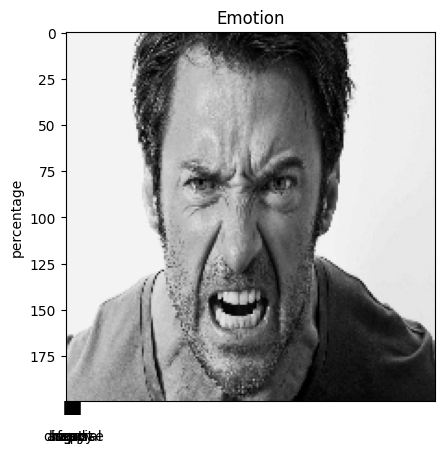

Expression Prediction: angry


In [34]:
img = image.load_img("/content/wallpaper2you_443897.jpg", grayscale = True, target_size = (48,48))
show = image.load_img("/content/wallpaper2you_443897.jpg", grayscale = True, target_size = (200,200))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
x = x/255.0

pred = model.predict(x)
display_emotion(pred[0])


plt.gray()
plt.imshow(show)
plt.show()

m=0.000000000000000000001
a=pred[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i

print('Expression Prediction:',classes[ind])

1/1 [==============================] - 0s 36ms/step


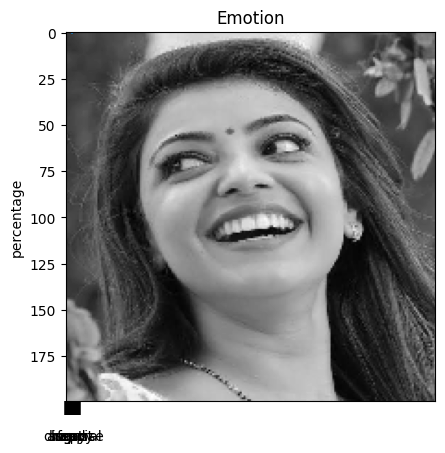

Expression Prediction: happy


In [40]:
img = image.load_img("/content/images (6).jpeg", grayscale = True, target_size = (48,48))
show = image.load_img("/content/images (6).jpeg", grayscale = True, target_size = (200,200))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
x = x/255.0

pred = model.predict(x)
display_emotion(pred[0])

plt.gray()
plt.imshow(show)
plt.show()

m=0.000000000000000000001
a=pred[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i

print('Expression Prediction:',classes[ind])